## Unzipping Files

In [1]:
# import zipfile

# # List of zip file paths
# zip_file_paths = ['trainImages.zip', 'validationImages.zip']

# # Loop through each zip file path
# for path in zip_file_paths:
#     # Convert the path to a string (optional but shown in the original code)
#     name = str(path)
    
#     # Open the zip file
#     with zipfile.ZipFile(path, 'r') as zip_ref:
#         # Extract all contents of the zip file into a specified directory
#         zip_ref.extractall(f'unzipped/{name.split(".")[0]}')


In [2]:
import numpy as numpy
import pandas as pd

## Training and  Validation dataframes

In those train and validation dataframes there are lots of unnessary images data (images that contains dogs, cats, men, .....)

In [3]:
df_validation = pd.read_csv('./unzipped/validationImages/labels/detections.csv')
df_train = pd.read_csv('./unzipped/trainImages/labels/detections.csv')

In [4]:
df_validation.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0001eeaf4aed83f9  xclick  /m/0cmf2           1  0.022673  0.964201   
1  000595fe6fee6369  xclick  /m/02wbm           1  0.000000  1.000000   
2  000595fe6fee6369  xclick  /m/02xwb           1  0.141384  0.179676   
3  000595fe6fee6369  xclick  /m/02xwb           1  0.213549  0.253314   
4  000595fe6fee6369  xclick  /m/02xwb           1  0.232695  0.288660   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.071038  0.800546           0            0          0            0   
1  0.000000  1.000000           0            0          1            0   
2  0.676275  0.731707           0            0          0            0   
3  0.299335  0.354767           1            0          0            0   
4  0.490022  0.545455           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [5]:
df_train.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.148438  0.587500           0            1  ...            0         0   
1  0.714063  0.948438           0            1  ...            0         0   
2  0.198437  0.590625           1            0  ...            0         0   
3  0.651563  0.925000           1            0  ...            0         0   
4  0.235938  0.385938           1            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.148438  0.012500  0.059375  0.195312  0.148438  0.357812  0.587500   
1  0.025000  0.248438  0.276563  0.214062  0.914062  0.714063  0.782813   
2  0.243750  0.151562  0.310937  0.262500  0.198437  0.434375  0.507812   
3  0.315625  0.429688  0.256250  0.423438  0.651563  0.921875  0.826562   
4  0.317188  0.257812  0.346875  0.307812  0.235938  0.289062  0.348438   

   XClick4Y  
0  0.325000  
1  0.948438  
2  0.590625  
3  0.925000  
4  0.385938  

[5 rows x 21 columns]

In [6]:
len(df_train)

14610229

In [7]:
len(df_validation)

303980

## Lets see how many images on the Train and Validation folders (That contains Polythin bags)

In [8]:
data_path_validation = 'unzipped/validationImages/data/*.jpg'
data_path_train = 'unzipped/trainImages/data/*.jpg'

In [12]:
import glob

train_list_ids=[]
validation_list_ids=[]

def get_ids(split, print_this,to_append_list):
    start=0
    end=0
    if split == data_path_train:
        start,end = 26,42
    elif split ==data_path_validation:
        start,end = 31,47
    else:
        raise Exception('Invalid Parameter')

    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list

    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
    print(len(img_ids))
    print(print_this)



In [13]:
get_ids(data_path_train,"I finished train task",train_list_ids)

449
I finished train task


In [14]:
train_list_ids[0]

'003bfa647c199309'

In [15]:
get_ids(data_path_validation,"I finished validation task",validation_list_ids)

9
I finished validation task


In [16]:
validation_list_ids[0]

'b300a5975ac68399'

In [17]:
len(train_list_ids),len(validation_list_ids)

(449, 9)

In [18]:
train_classes_df=pd.read_csv('unzipped/trainImages/metadata/classes.csv',names=['className','object'])
validation_classes_df=pd.read_csv('unzipped/validationImages/metadata/classes.csv',names=['className','object'])

## Dataframes that contains Class details

In [19]:
train_classes_df

className      object
0      /m/011k07    Tortoise
1    /m/011q46kg   Container
2      /m/012074      Magpie
3      /m/0120dh  Sea turtle
4      /m/01226z    Football
..           ...         ...
596     /m/0qmmr  Wheelchair
597   /m/0wdt60w  Rugby ball
598      /m/0xfy   Armadillo
599     /m/0xzly     Maracas
600     /m/0zvk5      Helmet

[601 rows x 2 columns]

In [20]:
validation_classes_df

className      object
0      /m/011k07    Tortoise
1    /m/011q46kg   Container
2      /m/012074      Magpie
3      /m/0120dh  Sea turtle
4      /m/01226z    Football
..           ...         ...
596     /m/0qmmr  Wheelchair
597   /m/0wdt60w  Rugby ball
598      /m/0xfy   Armadillo
599     /m/0xzly     Maracas
600     /m/0zvk5      Helmet

[601 rows x 2 columns]

## Check polythin class ID

In [21]:
train_classes_df[train_classes_df['object']=="Plastic bag"]

className       object
327  /m/05gqfk  Plastic bag

In [22]:
validation_classes_df[validation_classes_df['object']=="Plastic bag"]

className       object
327  /m/05gqfk  Plastic bag

In [23]:
import random

def random_row_from_df(split):
    dataframe = ''

    if split=="train":
        dataframe,ids_to_check = df_train, train_list_ids
    elif split=="validation":
        dataframe,ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid Parameter")

    img_ids_len = len(ids_to_check)
    rand = random.randint(0,img_ids_len-1)
    id = ids_to_check[rand]
    r = dataframe.loc[(dataframe.ImageID==id) & (dataframe.LabelName == "/m/05gqfk")]
    # print(r)
    return r


In [24]:
random_row_from_df('train')

ImageID  Source  LabelName  Confidence      XMin      XMax  \
9867999  a89b2caff50e8f86  xclick  /m/05gqfk           1  0.524167  0.708333   

           YMin  YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
9867999  0.7375  0.99           0            0  ...            0         0   

         XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
9867999  0.633333  0.524167  0.708333  0.583333    0.7375   0.88625   0.90625   

         XClick4Y  
9867999      0.99  

[1 rows x 21 columns]

In [25]:
random_row_from_df('validation')

ImageID  Source  LabelName  Confidence  XMin      XMax  YMin  \
276292  e80333c5111504d1  xclick  /m/05gqfk           1   0.0  0.998437  0.05   

          YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  IsInside  
276292  0.9625           0            0          0            0         0

## Function to show a random iamge

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
import glob

image_path_validation = 'unzipped/validationImages/data/*.jpg'
image_path_train = 'unzipped/trainImages/data/*.jpg'

def visulaize_random_image(split):
    split_path=""
    if split=="train":
        split_path=image_path_train
    elif split=="validation":
        split_path = image_path_validation
    else:
        raise Exception("Invalid Parameter")
        
    images_folder=split_path
    images_path=glob.glob(images_folder)
    num_of_images=len(images_path)
    random_int = random.randint(0,num_of_images-1)
    random_image=images_path[random_int]
    img = mpimg.imread(random_image)

    plt.imshow(img)
    plt.axis('off') 
    plt.show()

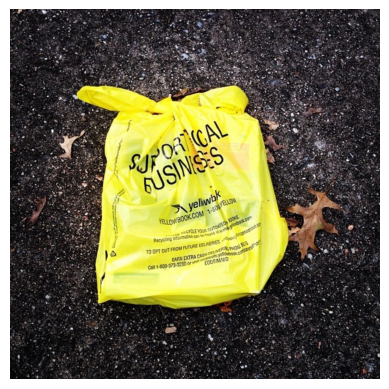

In [27]:
visulaize_random_image('train')

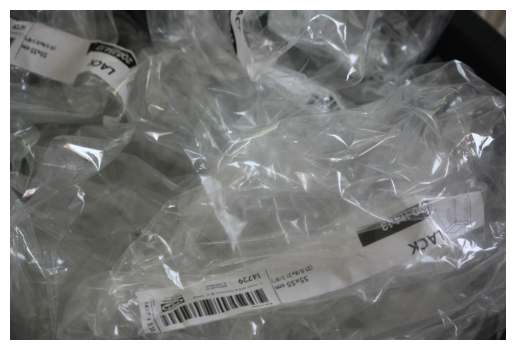

In [28]:
visulaize_random_image('validation')

## Visualize 20 images at one

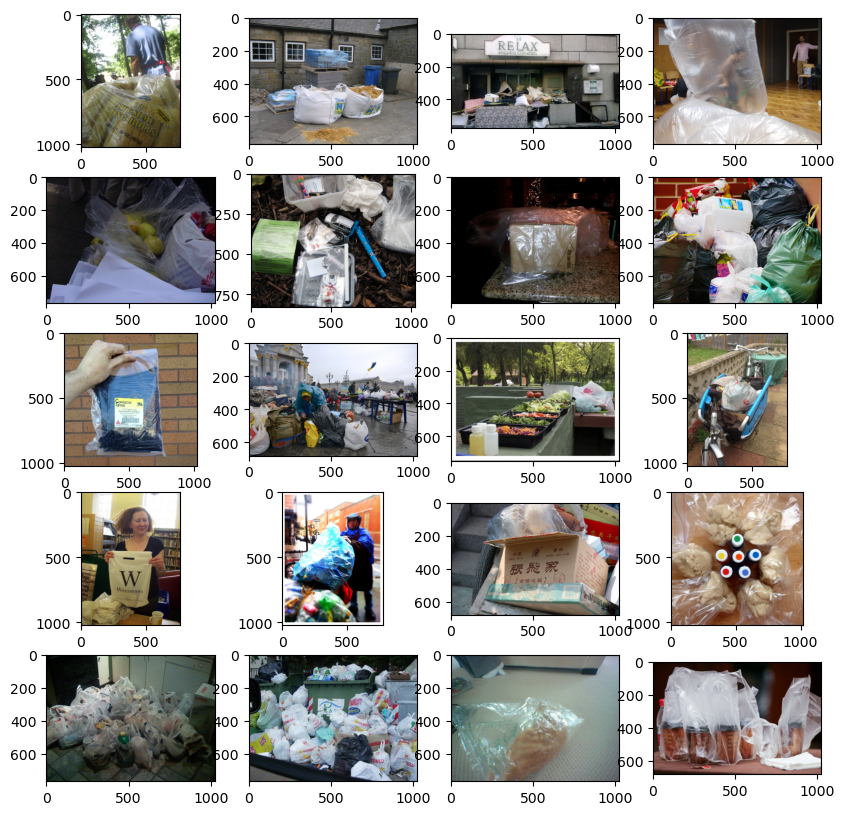

In [33]:
import matplotlib.pyplot as pyplot
import glob
import matplotlib.image as mpimg

fig = plt.figure(figsize=(10,10))

columns=4
rows=5

image_path_validation = 'unzipped/validationImages/data/*.jpg'
image_path_train = 'unzipped/trainImages/data/*.jpg'

def visulaize_many_images(from_num,to_num,dataset):
    
    dataset_path=""
    if dataset=="train":
        dataset_path=image_path_train
    elif dataset=="validation":
        dataset_path = image_path_validation
    else:
        raise Exception("Invalid Parameter")
      
    images_path = glob.glob(dataset_path)

    index_counter = 1

    for i in range(from_num,to_num):
        counter = i
        image = images_path[counter]
        img = mpimg.imread(image)
        fig.add_subplot(rows,columns,index_counter)
        plt.imshow(img)
        index_counter+=1
    
    plt.show()

visulaize_many_images(200,220,'train')

## Draw a bouding box for Single Image

768 1024


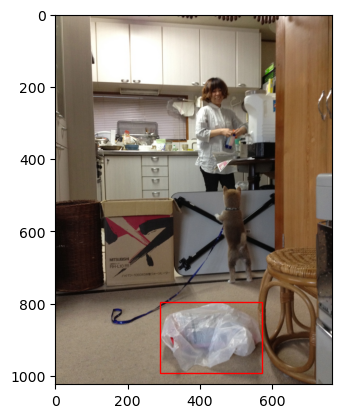

289.599744 572.7997439999999 796.8 992.0


In [35]:
# Theory Lesson
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im=Image.open('./unzipped/validationImages/data/4e24222b68123ef3.jpg')

fig,ax = plt.subplots()

ax.imshow(im)
# plt.axis('off') 


image_width, image_height = im.size
print(image_width, image_height)

xmin = 0.377083 * image_width
xmax = 0.745833 * image_width
ymin = 0.778125 * image_height
ymax = 0.96875 * image_height

bound_box_width = xmax - xmin
bound_box_height = ymax - ymin

rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)

plt.show()

print(xmin,xmax,ymin,ymax)


## Function to Generate many boxes in a image

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

image_path_validation = 'unzipped/validationImages/data/*.jpg'
image_path_train = 'unzipped/trainImages/data/*.jpg'

def visulaize_bb(dataset):
    
    dataset_path=""
    if dataset=="train":
        dataset_path=image_path_train
    elif dataset=="validation":
        dataset_path = image_path_validation
    else:
        raise Exception("Invalid Parameter")

    start = 0
    end = 0

    if dataset=="train":
        start,end,df,split = 26,42,df_train,"trainImages"
    elif dataset=="validation":
        start,end,df,split = 31,47,df_validation,"validationImages"
    else:
        raise Exception('Invalid Parameter')

    image_folder = dataset_path
    images_paths = glob.glob(image_folder)

    number_of_images = len(images_paths)
    random_int = random.randint(0,number_of_images - 1)
    
    random_image = images_paths[random_int]
    # print(random_image)
    

    img = Image.open(random_image)
    id_of_image = random_image[start:end]
    # print(id_of_image)

    df_rows = df.loc[(df['ImageID']==id_of_image) & (df["LabelName"]=="/m/05gqfk")]


    fig,ax = plt.subplots()
    ax.imshow(img)
    image_width, image_height = img.size
    print(image_width,image_height)
    
    for index,row in df_rows.iterrows():
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin'] * image_height
        ymax = row['YMax'] * image_height

        bound_box_width = xmax - xmin
        bound_box_height = ymax - ymin
        
        rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    

1024 739


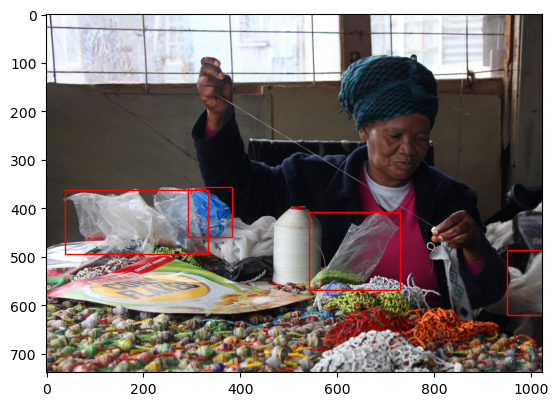

In [37]:
visulaize_bb('train')

1024 682


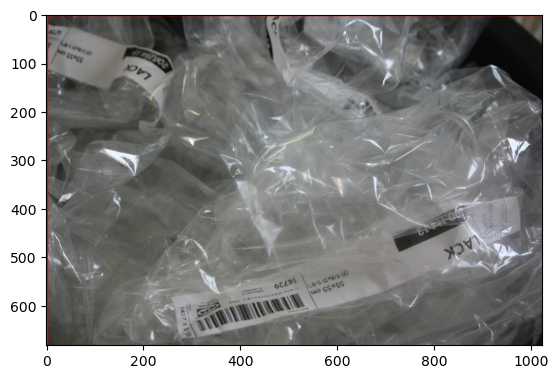

In [38]:
visulaize_bb('validation')

In [39]:
def clean_dataframe(df_for_train,df_for_validation):
    df_train_cleaned = df_train[df_train["LabelName"].str.contains("/m/05gqfk")]
    df_validation_cleaned = df_validation[df_for_validation["LabelName"].str.contains("/m/05gqfk")]

    return df_train_cleaned,df_validation_cleaned

## Taking only Polything Images rows from validtion and train csv dataframe

In [40]:
df_train_cleaned,df_validation_cleaned = clean_dataframe(df_train,df_validation)

In [41]:
df_train_cleaned.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
8282   0005a922e055c723  xclick  /m/05gqfk           1  0.000000  0.999375   
8733   000610ca2148a5ec  xclick  /m/05gqfk           1  0.163227  0.811445   
10247  00075e339f3d4f37  xclick  /m/05gqfk           1  0.017578  0.999023   
12496  00097c09aca0cabf  xclick  /m/05gqfk           1  0.112000  0.634000   
40914  002c60d5fbc94244  xclick  /m/05gqfk           1  0.375000  0.461250   

           YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
8282   0.000000  0.998889           0            1  ...            0   
8733   0.051875  0.936875           0            0  ...            0   
10247  0.000000  0.998529           0            1  ...            0   
12496  0.000000  0.909414           1            1  ...            0   
40914  0.646993  0.772829           0            0  ...            0   

       IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
8282          0  0.546875  0.700000  0.000000  0.999375  0.000000  0.998889   
8733          0  0.740150  0.163227  0.811445  0.811445  0.051875  0.161250   
10247         0  0.263672  0.999023  0.516602  0.017578  0.000000  0.107353   
12496         0  0.355000  0.634000  0.325000  0.112000  0.000000  0.390764   
40914         0  0.433125  0.375000  0.461250  0.457500  0.646993  0.755011   

       XClick3Y  XClick4Y  
8282   0.000000  0.593333  
8733   0.936875  0.936875  
10247  0.998529  0.385294  
12496  0.909414  0.600355  
40914  0.766147  0.772829  

[5 rows x 21 columns]

In [42]:
df_validation_cleaned.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
26213   1602934b52b119cc  xclick  /m/05gqfk           1  0.000000  1.000000   
86384   488ab15e2780bec9  xclick  /m/05gqfk           1  0.000000  1.000000   
92793   4e24222b68123ef3  xclick  /m/05gqfk           1  0.377083  0.745833   
98200   527bec033e8298a5  xclick  /m/05gqfk           1  0.107813  0.995313   
148850  7e25a4a33611d933  xclick  /m/05gqfk           1  0.000000  1.000000   

            YMin     YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
26213   0.000000  1.00000           1            0          1            0   
86384   0.023599  1.00000           0            0          1            0   
92793   0.778125  0.96875           0            0          0            0   
98200   0.106250  0.99375           0            0          0            0   
148850  0.000000  1.00000           0            0          1            0   

        IsInside  
26213          0  
86384          0  
92793          0  
98200          0  
148850         0

#### There are 986 Images in the train dataframe because there are one images that contains more polythin bag  bounding box

In [43]:
len(df_train_cleaned),len(df_validation_cleaned)

(986, 9)

## Splitting train data in to train and test again
 
we will use test data to tune the model

validation data to test the model at the end

In [44]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train_cleaned, test_size=0.2, random_state=42)

In [45]:
train.head()

ImageID     Source  LabelName  Confidence      XMin  \
10807483  b9176db9b1661faa     xclick  /m/05gqfk           1  0.231111   
3193099   3435faef2c5ccd6a  activemil  /m/05gqfk           1  0.005625   
13211126  e39390cebf26f22c     xclick  /m/05gqfk           1  0.213867   
6702608   711d64cd98b9be73     xclick  /m/05gqfk           1  0.000000   
5729014   60516e61f76f6ebf     xclick  /m/05gqfk           1  0.245833   

              XMax      YMin      YMax  IsOccluded  IsTruncated  ...  \
10807483  0.502222  0.540000  0.652500           0            0  ...   
3193099   0.990000  0.001667  0.995833          -1           -1  ...   
13211126  0.742188  0.101562  0.643229           0            0  ...   
6702608   0.999167  0.000000  0.998750           0            1  ...   
5729014   0.465000  0.740625  0.887500           1            0  ...   

          IsDepiction  IsInside  XClick1X  XClick2X  XClick3X  XClick4X  \
10807483            0         0  0.373333  0.231111  0.275556  0.502222   
3193099            -1        -1 -1.000000 -1.000000 -1.000000 -1.000000   
13211126            0         0  0.591797  0.256836  0.213867  0.742188   
6702608             0         0  0.348333  0.000000  0.316667  0.999167   
5729014             0         0  0.320833  0.245833  0.425833  0.465000   

          XClick1Y  XClick2Y  XClick3Y  XClick4Y  
10807483  0.540000  0.587500  0.652500  0.587500  
3193099  -1.000000 -1.000000 -1.000000 -1.000000  
13211126  0.101562  0.119792  0.643229  0.572917  
6702608   0.000000  0.831250  0.998750  0.906250  
5729014   0.740625  0.887500  0.882500  0.740625  

[5 rows x 21 columns]

In [46]:
test.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
8043647   888fea91e5a0e984  xclick  /m/05gqfk           1  0.293125  0.601875   
5494785   5c3a12529a5afe93  xclick  /m/05gqfk           1  0.000000  0.998438   
10048712  abd0b8f885cadc1e  xclick  /m/05gqfk           1  0.675000  0.989583   
5040124   544ee383a0319bfa  xclick  /m/05gqfk           1  0.000000  0.999375   
2147024   221dd6f9138951a7  xclick  /m/05gqfk           1  0.595625  0.766875   

              YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
8043647   0.196998  0.910882           1            0  ...            0   
5494785   0.233333  0.997917           1            1  ...            0   
10048712  0.580469  0.891406           1            0  ...            0   
5040124   0.000000  0.999074           1            1  ...            0   
2147024   0.431265  0.542812           1            0  ...            0   

          IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  \
8043647          0  0.378750  0.293125  0.601875  0.423750  0.196998   
5494785          0  0.328125  0.000000  0.846875  0.998438  0.233333   
10048712         0  0.806250  0.675000  0.728125  0.989583  0.580469   
5040124          0  0.347500  0.000000  0.999375  0.891875  0.000000   
2147024          0  0.696875  0.595625  0.621875  0.766875  0.431265   

          XClick2Y  XClick3Y  XClick4Y  
8043647   0.405253  0.575985  0.910882  
5494785   0.564583  0.997917  0.497917  
10048712  0.697656  0.891406  0.860938  
5040124   0.539815  0.179630  0.999074  
2147024   0.500393  0.542812  0.500393  

[5 rows x 21 columns]

In [47]:
len(train),len(test)

(788, 198)

In [50]:
# import os
# from os import path

# path = "./unzipped/testImages"
# os.mkdir(path)

In [51]:
# path = "./unzipped/testImages/data"
# os.mkdir(path)

In [52]:
len(test["ImageID"].unique())

162

In [53]:
test_ids = test["ImageID"].values.tolist()

In [54]:
train_ids = train["ImageID"].values.tolist()

In [55]:
len(test_ids),len(train_ids)

(198, 788)

## Copying and Cutting Images to Test folder

In [56]:
# import shutil
# import glob

# to_loop = './unzipped/trainImages/data/*.jpg'
# folder = glob.glob(to_loop)

# new_path = './unzipped/testImages/data/'

# for path in folder:
#     id = path[28:44]
#     if((id in test_ids) and (id in train_ids)):
#         shutil.copy(path,f'{new_path}/{id}.jpg')
#     elif((id in test_ids) and (id not in train_ids)):
#         shutil.move(path,f'{new_path}/{id}.jpg')   

In [57]:
import glob

to_loop = './unzipped/testImages/data/*.jpg'
test_images = glob.glob(to_loop)
len(test_images)

162

In [58]:
import glob

to_loop = './unzipped/trainImages/data/*.jpg'
train_images = glob.glob(to_loop)
len(train_images)

449

In [59]:
import glob

to_loop = './unzipped/testImages/data/*.jpg'
test_images = glob.glob(to_loop)

counter=0
for image in test_images:
    if image[27:43] in test["ImageID"].unique().tolist():
        counter=counter+1

print(counter)

162


In [60]:
import glob

to_loop = './unzipped/trainImages/data/*.jpg'
train_images = glob.glob(to_loop)

counter=0
for image in train_images:
    
    if image[28:44] in train["ImageID"].unique().tolist():
        counter=counter+1

print(counter)

449


In [72]:
train[train['ImageID']=='888fea91e5a0e984']

ImageID  Source  LabelName  Confidence      XMin      XMax  \
8043645  888fea91e5a0e984  xclick  /m/05gqfk           1  0.011250  0.405625   
8043644  888fea91e5a0e984  xclick  /m/05gqfk           1  0.000000  0.279375   
8043646  888fea91e5a0e984  xclick  /m/05gqfk           1  0.138125  0.378750   

             YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
8043645  0.288931  0.999062           0            1  ...            0   
8043644  0.108818  0.685741           1            1  ...            0   
8043646  0.026266  0.370544           1            0  ...            0   

         IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
8043645         0  0.241875  0.405625  0.293125   0.01125  0.288931  0.842402   
8043644         0  0.111250  0.000000  0.279375   0.00625  0.108818  0.424015   
8043646         0  0.144375  0.138125  0.378750   0.27000  0.026266  0.172608   

         XClick3Y  XClick4Y  
8043645  0.999062  0.712946  
8043644  0.385553  0.685741  
8043646  0.185741  0.370544  

[3 rows x 21 columns]

## Format Data in to RecordIO format

In [ ]:
# 222 2 5   0.000 0.4 0.3 0.9 0.44  path/image.jpg

# cat could be 1.000
# dog could be 2.000

# 5 means 0.000 0.4 0.3 0.9 0.44
# 2 means 2 and 5

In [ ]:
# https://cv.gluon.ai/build/examples_datasets/detection_custom.html

![Alt Text](./images/recordIO_format.png)

![Alt Text](./images/recordIO_details.png)

### Why we add diffrent bouding boxes on the same images in a one line? To reduce storage. In our dataset there will are small dataset. We can use Separate Line for same image woth diffrent bounding box

## Also Label Width is not need in latest mxnet

In [86]:
train = train.rename(columns={"LabelName":"className"})

In [88]:
test = test.rename(columns={"LabelName":"className"})

In [89]:
test

ImageID  Source  className  Confidence      XMin      XMax  \
8043647   888fea91e5a0e984  xclick  /m/05gqfk           1  0.293125  0.601875   
5494785   5c3a12529a5afe93  xclick  /m/05gqfk           1  0.000000  0.998438   
10048712  abd0b8f885cadc1e  xclick  /m/05gqfk           1  0.675000  0.989583   
5040124   544ee383a0319bfa  xclick  /m/05gqfk           1  0.000000  0.999375   
2147024   221dd6f9138951a7  xclick  /m/05gqfk           1  0.595625  0.766875   
...                    ...     ...        ...         ...       ...       ...   
1104154   102e5834dbf0b1cc  xclick  /m/05gqfk           1  0.528125  0.662500   
5995456   64f1b54aa2f25853  xclick  /m/05gqfk           1  0.683750  0.998750   
135411    011c2e4461eb1fdc  xclick  /m/05gqfk           1  0.306836  0.998410   
9872849   a8b17d203d9eea1a  xclick  /m/05gqfk           1  0.125000  0.181667   
14145224  f6a61b3b167cbbbc  xclick  /m/05gqfk           1  0.527500  0.905000   

              YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  \
8043647   0.196998  0.910882           1            0  ...            0   
5494785   0.233333  0.997917           1            1  ...            0   
10048712  0.580469  0.891406           1            0  ...            0   
5040124   0.000000  0.999074           1            1  ...            0   
2147024   0.431265  0.542812           1            0  ...            0   
...            ...       ...         ...          ...  ...          ...   
1104154   0.613333  0.728333           1            0  ...            0   
5995456   0.000000  0.335000           1            1  ...            0   
135411    0.152500  0.998750           1            1  ...            0   
9872849   0.466250  0.661250           0            0  ...            0   
14145224  0.410000  0.980000           0            0  ...            0   

          IsInside  XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  \
8043647          0  0.378750  0.293125  0.601875  0.423750  0.196998   
5494785          0  0.328125  0.000000  0.846875  0.998438  0.233333   
10048712         0  0.806250  0.675000  0.728125  0.989583  0.580469   
5040124          0  0.347500  0.000000  0.999375  0.891875  0.000000   
2147024          0  0.696875  0.595625  0.621875  0.766875  0.431265   
...            ...       ...       ...       ...       ...       ...   
1104154          0  0.538125  0.528125  0.586250  0.662500  0.613333   
5995456          0  0.760000  0.683750  0.892500  0.998750  0.000000   
135411           0  0.995231  0.998410  0.833068  0.306836  0.152500   
9872849          0  0.160000  0.125000  0.128333  0.181667  0.466250   
14145224         0  0.626875  0.527500  0.553750  0.905000  0.410000   

          XClick2Y  XClick3Y  XClick4Y  
8043647   0.405253  0.575985  0.910882  
5494785   0.564583  0.997917  0.497917  
10048712  0.697656  0.891406  0.860938  
5040124   0.539815  0.179630  0.999074  
2147024   0.500393  0.542812  0.500393  
...            ...       ...       ...  
1104154   0.633333  0.728333  0.692500  
5995456   0.000000  0.335000  0.098333  
135411    0.682500  0.998750  0.547500  
9872849   0.468750  0.661250  0.658750  
14145224  0.965000  0.980000  0.820000  

[198 rows x 21 columns]

In [90]:
train['header_cols'] = 2
train['label_width'] = 5

In [92]:
train.head()

ImageID     Source  className  Confidence      XMin  \
10807483  b9176db9b1661faa     xclick  /m/05gqfk           1  0.231111   
3193099   3435faef2c5ccd6a  activemil  /m/05gqfk           1  0.005625   
13211126  e39390cebf26f22c     xclick  /m/05gqfk           1  0.213867   
6702608   711d64cd98b9be73     xclick  /m/05gqfk           1  0.000000   
5729014   60516e61f76f6ebf     xclick  /m/05gqfk           1  0.245833   

              XMax      YMin      YMax  IsOccluded  IsTruncated  ...  \
10807483  0.502222  0.540000  0.652500           0            0  ...   
3193099   0.990000  0.001667  0.995833          -1           -1  ...   
13211126  0.742188  0.101562  0.643229           0            0  ...   
6702608   0.999167  0.000000  0.998750           0            1  ...   
5729014   0.465000  0.740625  0.887500           1            0  ...   

          XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  \
10807483  0.373333  0.231111  0.275556  0.502222  0.540000  0.587500   
3193099  -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
13211126  0.591797  0.256836  0.213867  0.742188  0.101562  0.119792   
6702608   0.348333  0.000000  0.316667  0.999167  0.000000  0.831250   
5729014   0.320833  0.245833  0.425833  0.465000  0.740625  0.887500   

          XClick3Y  XClick4Y  header_cols  label_width  
10807483  0.652500  0.587500            2            5  
3193099  -1.000000 -1.000000            2            5  
13211126  0.643229  0.572917            2            5  
6702608   0.998750  0.906250            2            5  
5729014   0.882500  0.740625            2            5  

[5 rows x 23 columns]

In [93]:
test['header_cols'] = 2
test['label_width'] = 5

In [95]:
test.head()

ImageID  Source  className  Confidence      XMin      XMax  \
8043647   888fea91e5a0e984  xclick  /m/05gqfk           1  0.293125  0.601875   
5494785   5c3a12529a5afe93  xclick  /m/05gqfk           1  0.000000  0.998438   
10048712  abd0b8f885cadc1e  xclick  /m/05gqfk           1  0.675000  0.989583   
5040124   544ee383a0319bfa  xclick  /m/05gqfk           1  0.000000  0.999375   
2147024   221dd6f9138951a7  xclick  /m/05gqfk           1  0.595625  0.766875   

              YMin      YMax  IsOccluded  IsTruncated  ...  XClick1X  \
8043647   0.196998  0.910882           1            0  ...  0.378750   
5494785   0.233333  0.997917           1            1  ...  0.328125   
10048712  0.580469  0.891406           1            0  ...  0.806250   
5040124   0.000000  0.999074           1            1  ...  0.347500   
2147024   0.431265  0.542812           1            0  ...  0.696875   

          XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
8043647   0.293125  0.601875  0.423750  0.196998  0.405253  0.575985   
5494785   0.000000  0.846875  0.998438  0.233333  0.564583  0.997917   
10048712  0.675000  0.728125  0.989583  0.580469  0.697656  0.891406   
5040124   0.000000  0.999375  0.891875  0.000000  0.539815  0.179630   
2147024   0.595625  0.621875  0.766875  0.431265  0.500393  0.542812   

          XClick4Y  header_cols  label_width  
8043647   0.910882            2            5  
5494785   0.497917            2            5  
10048712  0.860938            2            5  
5040124   0.999074            2            5  
2147024   0.500393            2            5  

[5 rows x 23 columns]

In [96]:
train['ImagePath'] = '001.Plastic_bag/images/train/' + train['ImageID'] + '.jpg'

In [98]:
train.head()

ImageID     Source  className  Confidence      XMin  \
10807483  b9176db9b1661faa     xclick  /m/05gqfk           1  0.231111   
3193099   3435faef2c5ccd6a  activemil  /m/05gqfk           1  0.005625   
13211126  e39390cebf26f22c     xclick  /m/05gqfk           1  0.213867   
6702608   711d64cd98b9be73     xclick  /m/05gqfk           1  0.000000   
5729014   60516e61f76f6ebf     xclick  /m/05gqfk           1  0.245833   

              XMax      YMin      YMax  IsOccluded  IsTruncated  ...  \
10807483  0.502222  0.540000  0.652500           0            0  ...   
3193099   0.990000  0.001667  0.995833          -1           -1  ...   
13211126  0.742188  0.101562  0.643229           0            0  ...   
6702608   0.999167  0.000000  0.998750           0            1  ...   
5729014   0.465000  0.740625  0.887500           1            0  ...   

          XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
10807483  0.231111  0.275556  0.502222  0.540000  0.587500  0.652500   
3193099  -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
13211126  0.256836  0.213867  0.742188  0.101562  0.119792  0.643229   
6702608   0.000000  0.316667  0.999167  0.000000  0.831250  0.998750   
5729014   0.245833  0.425833  0.465000  0.740625  0.887500  0.882500   

          XClick4Y  header_cols  label_width  \
10807483  0.587500            2            5   
3193099  -1.000000            2            5   
13211126  0.572917            2            5   
6702608   0.906250            2            5   
5729014   0.740625            2            5   

                                                  ImagePath  
10807483  001.Plastic_bag/images/train/b9176db9b1661faa.jpg  
3193099   001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg  
13211126  001.Plastic_bag/images/train/e39390cebf26f22c.jpg  
6702608   001.Plastic_bag/images/train/711d64cd98b9be73.jpg  
5729014   001.Plastic_bag/images/train/60516e61f76f6ebf.jpg  

[5 rows x 24 columns]

In [99]:
test['ImagePath'] = '001.Plastic_bag/images/test/' + test['ImageID'] + '.jpg'

In [101]:
test.head()

ImageID  Source  className  Confidence      XMin      XMax  \
8043647   888fea91e5a0e984  xclick  /m/05gqfk           1  0.293125  0.601875   
5494785   5c3a12529a5afe93  xclick  /m/05gqfk           1  0.000000  0.998438   
10048712  abd0b8f885cadc1e  xclick  /m/05gqfk           1  0.675000  0.989583   
5040124   544ee383a0319bfa  xclick  /m/05gqfk           1  0.000000  0.999375   
2147024   221dd6f9138951a7  xclick  /m/05gqfk           1  0.595625  0.766875   

              YMin      YMax  IsOccluded  IsTruncated  ...  XClick2X  \
8043647   0.196998  0.910882           1            0  ...  0.293125   
5494785   0.233333  0.997917           1            1  ...  0.000000   
10048712  0.580469  0.891406           1            0  ...  0.675000   
5040124   0.000000  0.999074           1            1  ...  0.000000   
2147024   0.431265  0.542812           1            0  ...  0.595625   

          XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  XClick4Y  \
8043647   0.601875  0.423750  0.196998  0.405253  0.575985  0.910882   
5494785   0.846875  0.998438  0.233333  0.564583  0.997917  0.497917   
10048712  0.728125  0.989583  0.580469  0.697656  0.891406  0.860938   
5040124   0.999375  0.891875  0.000000  0.539815  0.179630  0.999074   
2147024   0.621875  0.766875  0.431265  0.500393  0.542812  0.500393   

          header_cols  label_width  \
8043647             2            5   
5494785             2            5   
10048712            2            5   
5040124             2            5   
2147024             2            5   

                                                 ImagePath  
8043647   001.Plastic_bag/images/test/888fea91e5a0e984.jpg  
5494785   001.Plastic_bag/images/test/5c3a12529a5afe93.jpg  
10048712  001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg  
5040124   001.Plastic_bag/images/test/544ee383a0319bfa.jpg  
2147024   001.Plastic_bag/images/test/221dd6f9138951a7.jpg  

[5 rows x 24 columns]

In [104]:
train = train[['header_cols','label_width','className','XMin','YMin','XMax','YMax','ImagePath']]
test = test[['header_cols','label_width','className','XMin','YMin','XMax','YMax','ImagePath']]

In [106]:
train.head()

header_cols  label_width  className      XMin      YMin      XMax  \
10807483            2            5  /m/05gqfk  0.231111  0.540000  0.502222   
3193099             2            5  /m/05gqfk  0.005625  0.001667  0.990000   
13211126            2            5  /m/05gqfk  0.213867  0.101562  0.742188   
6702608             2            5  /m/05gqfk  0.000000  0.000000  0.999167   
5729014             2            5  /m/05gqfk  0.245833  0.740625  0.465000   

              YMax                                          ImagePath  
10807483  0.652500  001.Plastic_bag/images/train/b9176db9b1661faa.jpg  
3193099   0.995833  001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg  
13211126  0.643229  001.Plastic_bag/images/train/e39390cebf26f22c.jpg  
6702608   0.998750  001.Plastic_bag/images/train/711d64cd98b9be73.jpg  
5729014   0.887500  001.Plastic_bag/images/train/60516e61f76f6ebf.jpg

In [107]:
test.head()

header_cols  label_width  className      XMin      YMin      XMax  \
8043647             2            5  /m/05gqfk  0.293125  0.196998  0.601875   
5494785             2            5  /m/05gqfk  0.000000  0.233333  0.998438   
10048712            2            5  /m/05gqfk  0.675000  0.580469  0.989583   
5040124             2            5  /m/05gqfk  0.000000  0.000000  0.999375   
2147024             2            5  /m/05gqfk  0.595625  0.431265  0.766875   

              YMax                                         ImagePath  
8043647   0.910882  001.Plastic_bag/images/test/888fea91e5a0e984.jpg  
5494785   0.997917  001.Plastic_bag/images/test/5c3a12529a5afe93.jpg  
10048712  0.891406  001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg  
5040124   0.999074  001.Plastic_bag/images/test/544ee383a0319bfa.jpg  
2147024   0.542812  001.Plastic_bag/images/test/221dd6f9138951a7.jpg

In [115]:
train.loc[:, 'className'] = "0.000"

In [118]:
train.head()

header_cols  label_width className      XMin      YMin      XMax  \
10807483            2            5     0.000  0.231111  0.540000  0.502222   
3193099             2            5     0.000  0.005625  0.001667  0.990000   
13211126            2            5     0.000  0.213867  0.101562  0.742188   
6702608             2            5     0.000  0.000000  0.000000  0.999167   
5729014             2            5     0.000  0.245833  0.740625  0.465000   

              YMax                                          ImagePath  
10807483  0.652500  001.Plastic_bag/images/train/b9176db9b1661faa.jpg  
3193099   0.995833  001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg  
13211126  0.643229  001.Plastic_bag/images/train/e39390cebf26f22c.jpg  
6702608   0.998750  001.Plastic_bag/images/train/711d64cd98b9be73.jpg  
5729014   0.887500  001.Plastic_bag/images/train/60516e61f76f6ebf.jpg

In [117]:
test.loc[:, 'className'] = "0.000"

In [119]:
test.head()

header_cols  label_width className      XMin      YMin      XMax  \
8043647             2            5     0.000  0.293125  0.196998  0.601875   
5494785             2            5     0.000  0.000000  0.233333  0.998438   
10048712            2            5     0.000  0.675000  0.580469  0.989583   
5040124             2            5     0.000  0.000000  0.000000  0.999375   
2147024             2            5     0.000  0.595625  0.431265  0.766875   

              YMax                                         ImagePath  
8043647   0.910882  001.Plastic_bag/images/test/888fea91e5a0e984.jpg  
5494785   0.997917  001.Plastic_bag/images/test/5c3a12529a5afe93.jpg  
10048712  0.891406  001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg  
5040124   0.999074  001.Plastic_bag/images/test/544ee383a0319bfa.jpg  
2147024   0.542812  001.Plastic_bag/images/test/221dd6f9138951a7.jpg

## Move Images to new directory

In [120]:
import shutil
shutil.move('unzipped/trainImages/data',"001.Plastic_bag/images/train")
shutil.move('unzipped/testImages/data',"001.Plastic_bag/images/test")

'001.Plastic_bag/images/test'

In [122]:
import glob

to_loop = '001.Plastic_bag/images/test/*.jpg'
test_images = glob.glob(to_loop)
len(test_images)

162

In [123]:
import glob

to_loop = '001.Plastic_bag/images/train/*.jpg'
train_images = glob.glob(to_loop)
len(train_images)

449

In [130]:
# Save 'train' DataFrame to CSV
train.to_csv('./mycsv/train.csv')

# Save 'test' DataFrame to CSV
test.to_csv('./mycsv/test.csv')

##  Use Saved  CSVs

In [44]:
import pandas as  pd

test=pd.read_csv('./mycsv/test.csv',index_col=0)
train=pd.read_csv('./mycsv/train.csv',index_col=0)

test['className'] = '0.000'
train["className"] = '0.000'

In [45]:
test.head()

header_cols  label_width className      XMin      YMin      XMax  \
8043647             2            5     0.000  0.293125  0.196998  0.601875   
5494785             2            5     0.000  0.000000  0.233333  0.998438   
10048712            2            5     0.000  0.675000  0.580469  0.989583   
5040124             2            5     0.000  0.000000  0.000000  0.999375   
2147024             2            5     0.000  0.595625  0.431265  0.766875   

              YMax                                         ImagePath  
8043647   0.910882  001.Plastic_bag/images/test/888fea91e5a0e984.jpg  
5494785   0.997917  001.Plastic_bag/images/test/5c3a12529a5afe93.jpg  
10048712  0.891406  001.Plastic_bag/images/test/abd0b8f885cadc1e.jpg  
5040124   0.999074  001.Plastic_bag/images/test/544ee383a0319bfa.jpg  
2147024   0.542812  001.Plastic_bag/images/test/221dd6f9138951a7.jpg

In [46]:
train.head()

header_cols  label_width className      XMin      YMin      XMax  \
10807483            2            5     0.000  0.231111  0.540000  0.502222   
3193099             2            5     0.000  0.005625  0.001667  0.990000   
13211126            2            5     0.000  0.213867  0.101562  0.742188   
6702608             2            5     0.000  0.000000  0.000000  0.999167   
5729014             2            5     0.000  0.245833  0.740625  0.465000   

              YMax                                          ImagePath  
10807483  0.652500  001.Plastic_bag/images/train/b9176db9b1661faa.jpg  
3193099   0.995833  001.Plastic_bag/images/train/3435faef2c5ccd6a.jpg  
13211126  0.643229  001.Plastic_bag/images/train/e39390cebf26f22c.jpg  
6702608   0.998750  001.Plastic_bag/images/train/711d64cd98b9be73.jpg  
5729014   0.887500  001.Plastic_bag/images/train/60516e61f76f6ebf.jpg

In [4]:
len(test),len(train)

(198, 788)

# Data Augmentation

![Alt Text](./images/y_flip.png)

## In the data augmentation part we double the image count by flipping the images over the y axis

In [5]:
test[test['ImagePath']=="001.Plastic_bag/images/test/93cbd5e7bc20c68d.jpg"]

header_cols  label_width  className      XMin    YMin      XMax  \
8682553            2            5        0.0  0.349167  0.2875  0.583333   

             YMax                                         ImagePath  
8682553  0.526875  001.Plastic_bag/images/test/93cbd5e7bc20c68d.jpg

768 1024


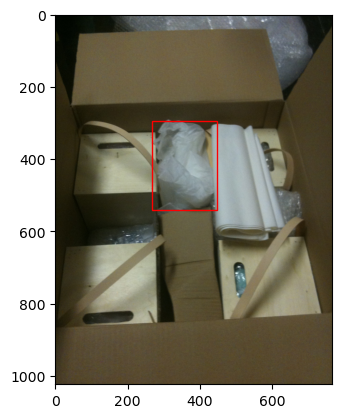

268.160256 447.99974399999996 294.4 539.52


In [6]:
# Theory Lesson
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im=Image.open("./PlasticDetection/images/001.Plastic_bag/images/test/93cbd5e7bc20c68d.jpg")

fig,ax = plt.subplots()

ax.imshow(im)
# plt.axis('off') 


image_width, image_height = im.size
print(image_width, image_height)

xmin = 0.349167 * image_width
xmax = 0.583333 * image_width
ymin = 0.2875 * image_height
ymax = 0.526875 * image_height

bound_box_width = xmax - xmin
bound_box_height = ymax - ymin

rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)

plt.show()

print(xmin,xmax,ymin,ymax)


In [7]:
# import shutil

# shutil.move('001.Plastic_bag/images/train','PlasticDetection/images/001.Plastic_bag/images/train')
# shutil.move('001.Plastic_bag/images/test','PlasticDetection/images/001.Plastic_bag/images/test')

768 1024


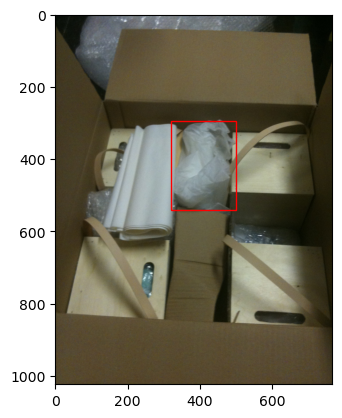

499.839744 320.00025600000004 294.4 539.52


In [8]:
# Theory Lesson
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im=Image.open("./PlasticDetection/images/001.Plastic_bag/images/test/93cbd5e7bc20c68d.jpg")
im = im.transpose(Image.FLIP_LEFT_RIGHT)

fig,ax = plt.subplots()

ax.imshow(im)
# plt.axis('off') 


image_width, image_height = im.size
print(image_width, image_height)

xmin = 0.349167 * image_width
xmax = 0.583333 * image_width
ymin = 0.2875 * image_height
ymax = 0.526875 * image_height

xmin = (image_width/2) - (xmin-(image_width/2))
xmax = (image_width/2) - (xmax-(image_width/2))

bound_box_width = xmax - xmin
bound_box_height = ymax - ymin

rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)

plt.show()

print(xmin,xmax,ymin,ymax)


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

test_path_validation = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
image_path_train = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'

def visulaize_right_image(dataset):
    
    dataset_path=""
    if dataset=="train":
        dataset_path=image_path_train
    elif dataset=="test":
        dataset_path = image_path_test
    else:
        raise Exception("Invalid Parameter")

    start = 0
    end = 0

    if dataset=="train":
        start,end,df,split = 53,69,train,"train"
    elif dataset=="test":
        start,end,df,split = 52,68,test,"test"
    else:
        raise Exception('Invalid Parameter')

    image_folder = dataset_path
    images_paths = glob.glob(image_folder)

    number_of_images = len(images_paths)
    random_int = random.randint(0,number_of_images - 1)
    
    random_image = images_paths[random_int]
    # print(random_image)
    

    img = Image.open(random_image)
    id_of_image = random_image[start:end]
    print(id_of_image)

    df_rows = df.loc[(df['ImagePath']==f'001.Plastic_bag/images/{split}/{id_of_image}.jpg')]


    fig,ax = plt.subplots()
    ax.imshow(img)
    
    image_width, image_height = img.size
    # print(image_width,image_height)
    
    for index,row in df_rows.iterrows():
        print("in")
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin'] * image_height
        ymax = row['YMax'] * image_height

        bound_box_width = xmax - xmin
        bound_box_height = ymax - ymin
        
        rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    

0889eb8501b7adce
in


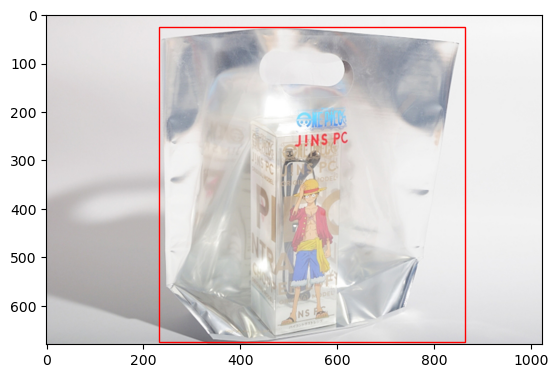

In [10]:
visulaize_right_image('train')

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import random

test_path_validation = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
image_path_train = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'

def visulaize_flipped_image(dataset):
    
    dataset_path=""
    if dataset=="train":
        dataset_path=image_path_train
    elif dataset=="test":
        dataset_path = image_path_test
    else:
        raise Exception("Invalid Parameter")

    start = 0
    end = 0

    if dataset=="train":
        start,end,df,split = 53,69,train,"train"
    elif dataset=="test":
        start,end,df,split = 52,68,test,"test"
    else:
        raise Exception('Invalid Parameter')

    image_folder = dataset_path
    images_paths = glob.glob(image_folder)

    number_of_images = len(images_paths)
    random_int = random.randint(0,number_of_images - 1)
    
    random_image = images_paths[random_int]
    # print(random_image)
    

    img = Image.open(random_image)
    id_of_image = random_image[start:end]
    print(id_of_image)

    df_rows = df.loc[(df['ImagePath']==f'001.Plastic_bag/images/{split}/{id_of_image}.jpg')]


    fig,ax = plt.subplots()
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    ax.imshow(img)
    
    image_width, image_height = img.size
    # print(image_width,image_height)
    
    for index,row in df_rows.iterrows():
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin'] * image_height
        ymax = row['YMax'] * image_height

        xmin = (image_width/2) - (xmin-(image_width/2))
        xmax = (image_width/2) - (xmax-(image_width/2))

        bound_box_width = xmax - xmin
        bound_box_height = ymax - ymin
        
        rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rectangle)
    

2a96abf3c061a5c6


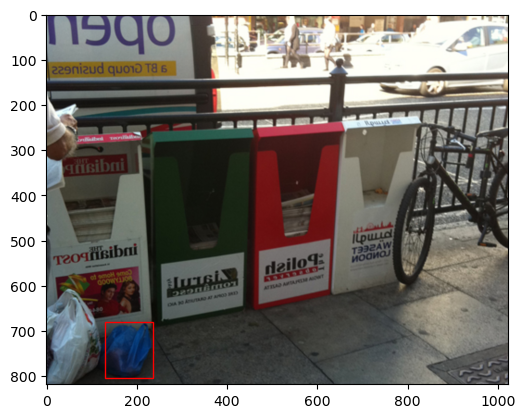

In [12]:
visulaize_flipped_image('train')

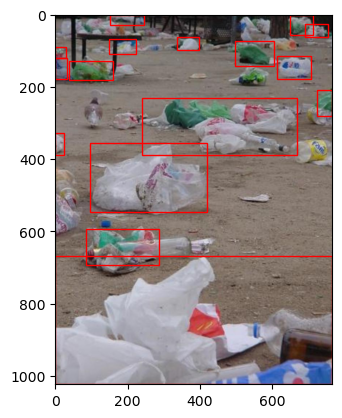

In [110]:
df=train
img = Image.open('./PlasticDetection/images/001.Plastic_bag/images/train/ecb16eefdc523ea0.jpg')



df_rows = train.loc[(train['ImagePath']=='001.Plastic_bag/images/train/ecb16eefdc523ea0.jpg')]


fig,ax = plt.subplots()
ax.imshow(img)

image_width, image_height = img.size
# print(image_width,image_height)

for index,row in df_rows.iterrows():
    xmin = float(row['XMin']) * image_width
    xmax = float(row['XMax']) * image_width
    ymin = float(row['YMin']) * image_height
    ymax = float(row['YMax']) * image_height

    bound_box_width = xmax - xmin
    bound_box_height = ymax - ymin
    
    rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rectangle)


In [47]:
test_images_path = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
train_images_path = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'
from PIL import Image

def augment_data(data_set):
    image_path = ''
    if data_set == 'train':
        image_path = train_images_path
    elif data_set == 'test':
        image_path = test_images_path
    else:
        raise Exception('Wrong parameter')

    start =0
    end = 0

    if data_set == 'train' :
        start,end,df,split = 29,45,train,'train'
    else:
        start,end,df,split = 28,44,test,'test'

    temp_df = pd.DataFrame(columns=['header_cols', 'label_width', 'className', 'XMin', 'YMin', 'XMax','YMax', 'ImagePath'] , dtype=object)
    counter=0

    for index,row in df.iterrows():
        img_path = row['ImagePath'] # image path in the df
        id = img_path[start:end]
        img_path_actual = f'PlasticDetection/images/001.Plastic_bag/images/{split}/{id}.jpg'  # actual path of the image
        img = Image.open(img_path_actual)
        image_width,image_hight = img.size
        img_flip = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
        img_flip.save(f'PlasticDetection/images/001.Plastic_bag/images/{split}/flipped_{id}.jpg')
        new_image_path = f'001.Plastic_bag/images/{split}/flipped_{id}.jpg'
        
        xmin = row['XMin'] * image_width
        xmax = row['XMax'] * image_width
        ymin = row['YMin'] 
        ymax = row['YMax'] 

        xmin = ((image_width/2) - (xmin-(image_width/2))) / image_width
        xmax = ((image_width/2) - (xmax-(image_width/2))) / image_width

        temp_df.loc[counter] = [2,5,"0.000",xmin,ymin,xmax,ymax,new_image_path]
        counter += 1

    df_marged = pd.concat([df, temp_df], ignore_index=True)
    df_marged.to_csv(f'{split}.lst', sep = "\t", float_format = "%.4f" , header = "None")
    print('previous table length')
    print(len(df))
    print('augmented df length ')
    print(len(temp_df))
    print('marged df length ')
    print(len(df_marged))
        

In [48]:
len(train),len(test)

(788, 198)

In [29]:
test_images_path = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
train_images_path = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'


test_images = glob.glob(test_images_path)
train_images = glob.glob(train_images_path)

len(train_images),len(test_images)

(449, 162)

In [49]:
augment_data('test')

previous table length
198
augmented df length 
198
marged df length 
396


In [50]:
test_images_path = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
train_images_path = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'


test_images = glob.glob(test_images_path)
train_images = glob.glob(train_images_path)

len(train_images),len(test_images)

(898, 324)

In [51]:
augment_data('train')

previous table length
788
augmented df length 
788
marged df length 
1576


In [52]:
test_images_path = 'PlasticDetection/images/001.Plastic_bag/images/test/*.jpg'
train_images_path = 'PlasticDetection/images/001.Plastic_bag/images/train/*.jpg'


test_images = glob.glob(test_images_path)
train_images = glob.glob(train_images_path)

len(train_images),len(test_images)

(898, 324)

1024 678


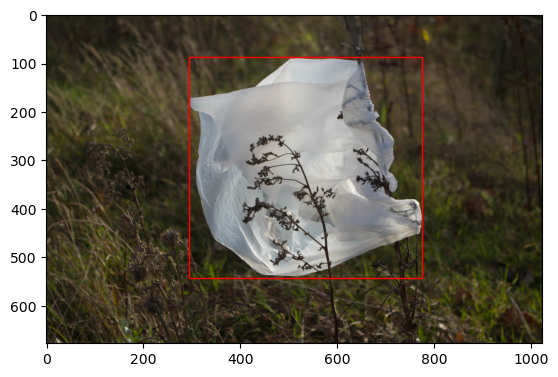

293.76 775.04 86.430762 542.91189


In [91]:
# Theory Lesson
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im=Image.open("./PlasticDetection/images/001.Plastic_bag/images/train/c0819cfe21c1c6a4.jpg")

fig,ax = plt.subplots()

ax.imshow(im)
# plt.axis('off') 


image_width, image_height = im.size
print(image_width, image_height)

xmin = 0.286875 * image_width
xmax = 0.756875* image_width
ymin = 	 0.127479* image_height
ymax = 	0.800755 * image_height

bound_box_width = xmax - xmin
bound_box_height = ymax - ymin

rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)

plt.show()

print(xmin,xmax,ymin,ymax)


1024 678


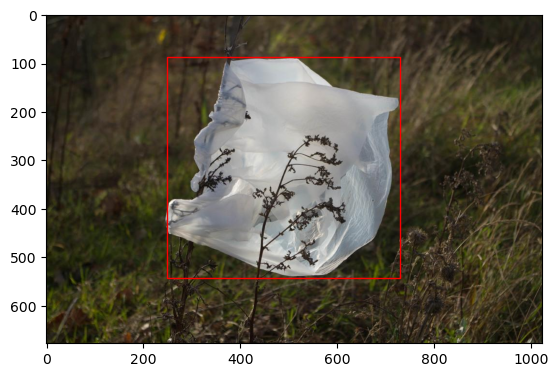

730.2144 248.9856 86.44500000000001 542.9424


In [93]:
# Theory Lesson
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im=Image.open("./PlasticDetection/images/001.Plastic_bag/images/train/flipped_c0819cfe21c1c6a4.jpg")

fig,ax = plt.subplots()

ax.imshow(im)
# plt.axis('off') 


image_width, image_height = im.size
print(image_width, image_height)
			
xmin = 0.7131 * image_width
xmax = 0.24315* image_width
ymin = 0.1275* image_height
ymax = 0.8008 * image_height

bound_box_width = xmax - xmin
bound_box_height = ymax - ymin

rectangle = patches.Rectangle((xmin,ymin),bound_box_width,bound_box_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)

plt.show()

print(xmin,xmax,ymin,ymax)


In [3]:
import distro
import os

if distro.id() == "debian":

    subprocess.run(["apt-get", "update"])

    subprocess.run(["apt-get", "install", "ffmpeg", "libsm6", "libxext6", "-y"])

In [12]:
!pip install opencv-python

In [13]:
!pip install mxnet

In [6]:
!pip show mxnet

Name: mxnet
Version: 1.9.1
Summary: Apache MXNet is an ultra-scalable deep learning framework. This version uses openblas and MKLDNN.
Home-page: https://github.com/apache/incubator-mxnet
Author: 
Author-email: 
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: graphviz, numpy, requests
Required-by: 


In [7]:
!pip show opencv-python

Name: opencv-python
Version: 4.10.0.82
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: numpy, numpy, numpy, numpy
Required-by: 


## Object Detection Example

#### https://github.com/aws-samples/aws-reinvent2019-arc407-object-detection-at-the-edge/blob/e3fa15343b46ec2ca8853aa8fe6ac3f67e5d2d9a/sagemaker_notebook/animal_detection_recordio_format.ipynb

## Convert lst to Record io

#### https://github.com/apache/mxnet/blob/master/tools/im2rec.py

In [20]:
RESIZE_SIZE = 256
BASE_DIR = "PlasticDetection/"

In [21]:
!python tools/prepare_dataset.py --resize $RESIZE_SIZE --pack-label test $BASE_DIR/images/

/opt/conda/lib/python3.10/site-packages/mxnet/numpy/utils.py:37: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  bool = onp.bool
Traceback (most recent call last):
  File "/home/sagemaker-user/tools/prepare_dataset.py", line 26, in <module>
    import mxnet as mx
  File "/opt/conda/lib/python3.10/site-packages/mxnet/__init__.py", line 33, in <module>
    from . import contrib
  File "/opt/conda/lib/python3.10/site-packages/mxnet/contrib/__init__.py", line 30, in <module>
    from . import text
  File "/opt/conda/lib/python3.10/site-packages/mxnet/contrib/text/__init__.py", line 23, in <module>
    from . import embedding
  File "/opt/conda/lib/python3.10/site-packages/mxnet/contrib/text/embedding.py", line 36, in <module>
    from ... import numpy as _mx_np
  File "/opt/conda/lib/python3.10/site-packages/mxnet/numpy/__init__.py", line 23, in <module>
    from .multiarray import *  # pylint: disable=wildcard-import
  File "/opt/conda/lib/pytho

## above operation didn't work because prepare_dataset.py required lower numpy version

## I created a sperate conda env. Then created recordIO files from that conda env

In [52]:
# plastic-object-detection-tkg-0001

import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
print(role)
sess = sagemaker.Session()

arn:aws:iam::767397975047:role/service-role/AmazonSageMaker-ExecutionRole-20240611T022211


In [53]:
bucket = 'plastic-object-detection-tkg-0001' 
prefix = 'DEMO-ObjectDetection'

## uploading train.rec to S3

In [15]:
train_channel = prefix +'/train'

sess.upload_data(path = 'train.rec' , bucket = bucket , key_prefix=train_channel)

s3_trian_data = "s3://{}/{}".format(bucket,train_channel)

In [16]:
print(f'file is save in {s3_trian_data}')

file is save in s3://plastic-object-detection-tkg-0001/DEMO-ObjectDetection/train


## uploading ttest.rec to S3

#### in order to train our model using sagemaker we have to use train data and tes data. In sagemaker test data is refered by Valdiation data.

this validation data use to evaluate the model while training

In [17]:
validation_channel = prefix +'/validation'

sess.upload_data(path = 'test.rec' , bucket = bucket , key_prefix=validation_channel)

s3_validation_data = "s3://{}/{}".format(bucket,validation_channel)

In [19]:
s3_validation_data

's3://plastic-object-detection-tkg-0001/DEMO-ObjectDetection/validation'

In [18]:
s3_output_location = 's3://{}/{}/output'.format(bucket,prefix)

### his code is useful for setting up a machine learning training job on Amazon SageMaker by specifying the exact Docker image that contains the necessary environment and dependencies for the specified machine learning framework and version.

In [54]:
from sagemaker import image_uris

training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = 'object-detection', version='1'
)

print(training_image)

991648021394.dkr.ecr.ap-south-1.amazonaws.com/object-detection:1


### The code snippet provided sets up a SageMaker Estimator for training a machine learning model using a specified Docker image

training_image: This is the URI of the Docker image that contains the training environment. It was retrieved earlier using the image_uris.retrieve function.

role: This is the AWS Identity and Access Management (IAM) role that SageMaker uses to access AWS resources during training. The role must have the necessary permissions to read input data from S3, write output data to S3, and manage other required AWS resources.

instance_count=1: This specifies the number of Amazon EC2 instances to use for the training job. In this case, only one instance is used.

instance_type='ml.p3.2xlarge': This specifies the type of EC2 instance to use for the training job. The ml.p3.2xlarge instance type is a powerful instance with GPU support, suitable for computationally intensive tasks like training deep learning models.

volume_size=50: This specifies the size (in GB) of the EBS volume to attach to the training instance(s). Here, a 50 GB volume is specified.

max_run=360000: This specifies the maximum duration (in seconds) for the training job. If the job runs longer than this time, it will be stopped. Here, the maximum run time is set to 360,000 seconds (100 hours).

input_mode='File': This specifies how the input data is provided to the training job. The 'File' mode indicates that the input data is downloaded from S3 to the local storage of the training instance.

output_path=s3_output_location: This specifies the S3 location where the output of the training job will be stored. The s3_output_location variable should contain the S3 URI of the desired output location.

sagemaker_session=sess: This specifies the SageMaker session to use. The sess variable should be an instance of a SageMaker session, which manages interactions with SageMaker APIs and resources.

In [56]:
od_model = sagemaker.estimator.Estimator(
    training_image,
    role,
    instance_count=1,
    instance_type='ml.p2.xlarge',
    volume_size = 50,
    max_run=360000,
    input_mode='File',
    output_path=s3_output_location,
    sagemaker_session=sess,
)

In [57]:
od_model

base_network="resnet-50": Specifies the base network architecture to use. In this case, it uses ResNet-50, a commonly used convolutional neural network architecture.

use_pretrained_model=1: Indicates whether to use a pretrained model. The value 1 typically means 'true', indicating that a pretrained model will be used.

num_classes=num_classes: Sets the number of classes to predict, which is taken from the local variable num_classes.

epochs=num_epoch: Sets the number of epochs for training, taken from the function parameter num_epoch.

lr_scheduler_step=lr_steps: Sets the learning rate scheduler steps, taken from the function parameter lr_steps.

lr_scheduler_rate=0.1: Sets the learning rate scheduler rate. This value indicates the factor by which the learning rate will be multiplied at each step.

momentum=0.9: Sets the momentum for the optimizer, which helps accelerate the optimizer's convergence towards the minima.

weight_decay=0.0005: Sets the weight decay (L2 regularization) parameter, which helps prevent overfitting by penalizing large weights.

nms_threshold=0.45: Sets the non-maximum suppression (NMS) threshold, used in object detection to remove duplicate bounding boxes.

image_shape=512: Sets the image shape (dimensions) for the input images. Here, it is set to 512, indicating square images of size 512x512 pixels.

num_training_samples=898: Sets the number of training samples, taken from the local variable num_training_samples.

In [58]:
def set_hyperparamters(num_epoch, lr_steps):
    num_classes = 1
    num_training_samples = 898

    od_model.set_hyperparameters(
    base_network="resnet-50",
    use_pretrained_model=1,
    num_classes=num_classes,
    epochs=num_epoch,
    lr_scheduler_step=lr_steps,
    lr_scheduler_factor=0.1,
    momentum=0.9,
    weight_decay=0.0005,
    nms_threshold=0.45,
    image_shape=512,
    num_training_samples=898
)


In [59]:
set_hyperparamters(100,'50,70,80,90,95')

## Hyperparameter Tuning in AWS
#### https://docs.aws.amazon.com/sagemaker/latest/dg/object-detection-api-config.html


"learning_rate": A continuous parameter with values ranging from 0.001 to 0.1.

"mini_batch_size": A categorical parameter with possible values of 8, 16, or 32.

"optimizer": A categorical parameter with possible values of "sgd" or "adam".

In [60]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "mini_batch_size": CategoricalParameter([8, 16]),
    "optimizer": CategoricalParameter(["sgd", "adam"])
}

max_jobs = 8: Specifies the maximum number of tuning jobs to run.

max_parallel_jobs = 1: Specifies the maximum number of tuning jobs to run in parallel.

objective_metric_name = "validation:mAP": The name of the objective metric used to evaluate the model's performance. Here, it's the mean Average Precision (mAP) on the validation dataset.

objective_type = "Maximize": Specifies that the tuning job should aim to maximize the objective metric.

In [61]:
max_jobs = 8
max_parallel_jobs = 1
objective_metric_name = "validation:mAP"
objective_type = "Maximize"


estimator = od_model: The SageMaker estimator object (model) to be tuned.

objective_metric_name = objective_metric_name: The name of the objective metric.

hyperparameter_ranges = hyperparameter_ranges: The ranges of hyperparameters to tune.

objective_type = objective_type: The type of objective (maximize or minimize).

max_jobs = max_jobs: The maximum number of tuning jobs.

max_parallel_jobs = max_parallel_jobs: The maximum number of parallel tuning jobs.

In [62]:
tuner = HyperparameterTuner(
    estimator = od_model,
    objective_metric_name = objective_metric_name,
    hyperparameter_ranges = hyperparameter_ranges,
    objective_type = objective_type,
    max_jobs = max_jobs,
    max_parallel_jobs = max_parallel_jobs
)


s3_train_data: The S3 URI of the training data.

distribution="FullyReplicated": Specifies that the training data should be fully replicated across all training instances.

content_type="application/x-recordio": Specifies the MIME type of the training data. In this case, it is set to "application/x-recordio", which is a format often used for storing machine learning datasets.

s3_data_type="S3Prefix": Indicates that the data in S3 is stored as objects under a common prefix.

In [63]:
train_data = sagemaker.inputs.TrainingInput(
    s3_trian_data,
    distribution="FullyReplicated",
    content_type="application/x-recordio",
    s3_data_type="S3Prefix"
)


validation_data = sagemaker.inputs.TrainingInput(
    s3_validation_data,
    distribution="FullyReplicated",
    content_type="application/x-recordio",
    s3_data_type="S3Prefix"
)

data_channels = {"train": train_data, "validation": validation_data}


In [ ]:
tuner.fit(inputs=data_channels , logs=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


................................................................................................................................................................................

## Now Training job is created in the Traing jobs  

In [2]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()
print(role)
sess = sagemaker.Session()

arn:aws:iam::767397975047:role/service-role/AmazonSageMaker-ExecutionRole-20240611T022211


In [4]:
from sagemaker import image_uris

training_image = image_uris.retrieve(
    region = sess.boto_region_name, framework = 'object-detection', version='1'
)

print(training_image)

991648021394.dkr.ecr.ap-south-1.amazonaws.com/object-detection:1


In [6]:
model = sagemaker.model.Model(
    image_uri= training_image,
    model_data = 's3://plastic-object-detection-tkg-0001/DEMO-ObjectDetection/output/object-detection-240618-1655-002-787a0ff5/output/model.tar.gz',
    role = role
)

## Let's Deploy the Model

In [7]:
endpoint_name = "plastice-detection-endpoint-001"

deployment = model.deploy(
    initial_instance_count = 1,
    instance_type = 'ml.m4.xlarge',
    endpoint_name= endpoint_name
)

--------!

# Lets check out model by testing with its end point

In [8]:
import json
import boto3

runtime = boto3.client(service_name = 'runtime.sagemaker')

In [110]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_detection(image_file, detections, thresh=0.6):
    img = mpimg.imread(image_file)
    plt.imshow(img)
    height = img.shape[0]
    width = img.shape[1]
    colors = dict()
    number_detections_to_show = 0

    for detection in detections:    
        klass, score, xmin , ymin , xmax, ymax = detection
        if score < thresh:
            continue
        number_detections_to_show += 1
        class_id = int(klass)
        if class_id not in colors:
            colors[class_id] = (random.random(),random.random(),random.random())
        xmin = int(xmin * width)
        ymin = int(ymin * height)
        xmax = int(xmax * width)
        ymax = int(ymax * height)

        rectangle_width = xmax - xmin
        rectangle_height = ymax - ymin
        
        rectangle = plt.Rectangle((xmin, ymin), rectangle_width, rectangle_height, fill=False, edgecolor=colors[class_id], linewidth=3.5)
        plt.gca().add_patch(rectangle)
        plt.gca().text(xmin, ymin, "{:.3f}".format(score), bbox=dict(facecolor=colors[class_id], alpha=0.5), fontsize=12, color='white')
        
        
    print(f'number of detections to show {number_detections_to_show}')
    plt.show()
        
    

- score means the confidence of a one detection 
- [0.0, 0.33429670333862305, 0.3885558247566223, 0.7500848770141602, 0.7661020159721375, 0.9519814252853394] 
- class, score, xmin, ymin, xmax, ymax
- endpoint_response['Body'].read() returns a the list of prections like above


### To use the model we must provide the binary Bite array of the image to the ned point

In [155]:
def show_plastic_prediction(filename, end_point, thresh=0.20):
    binary = ''
    with open(filename , 'rb') as image:
        f = image.read()
        binary = bytearray(f)

    endpoint_response = runtime.invoke_endpoint(EndpointName = end_point, ContentType = 'image/jpeg', Body = binary)
    results = endpoint_response['Body'].read()
    detections= json.loads(results)['prediction']

    visualize_detection(filename , detections,thresh)
    

number of detections to show 1


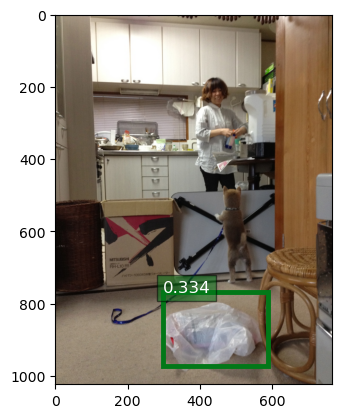

In [116]:
endpoint_name = "plastice-detection-endpoint-001"
show_plastic_prediction('unzipped/validationImages/data/4e24222b68123ef3.jpg',endpoint_name)

number of detections to show 3


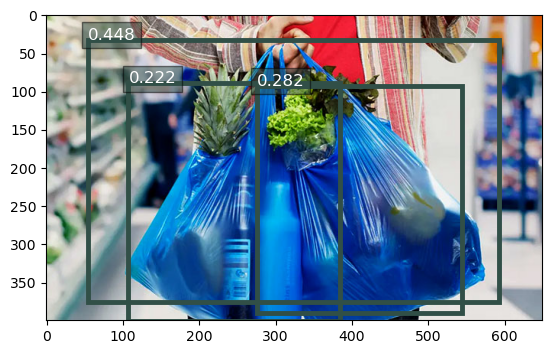

In [156]:
show_plastic_prediction('Polythene_images/1711623256-shopping-bags-court-order.jpg',endpoint_name)

number of detections to show 6


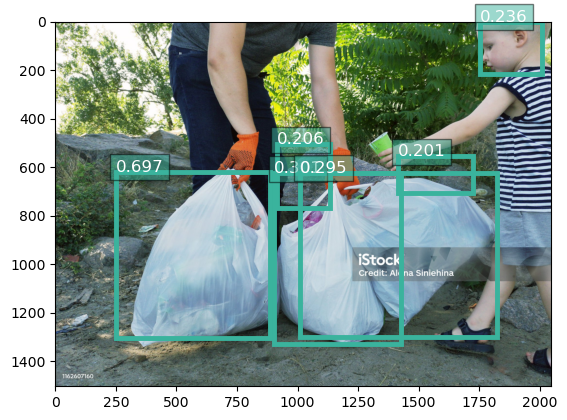

In [157]:
show_plastic_prediction('Polythene_images/istockphoto-1162607160-2048x2048.jpg',endpoint_name)

number of detections to show 6


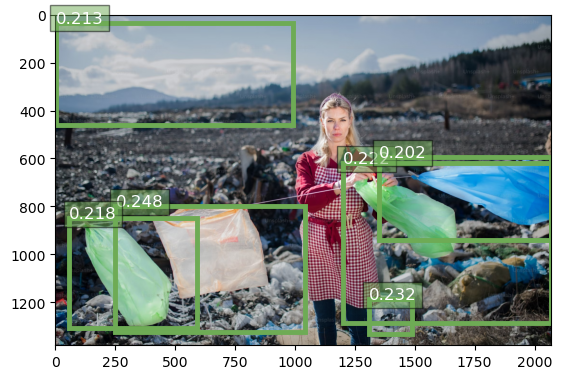

In [158]:
show_plastic_prediction('Polythene_images/premium_photo-1663054596472-12a3d4680f6f.jpg',endpoint_name)

number of detections to show 7


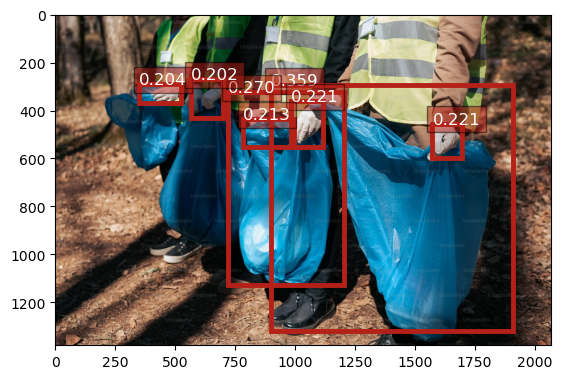

In [159]:
show_plastic_prediction('Polythene_images/premium_photo-1678836048282-56b30771bfe9.jpg',endpoint_name)

number of detections to show 5


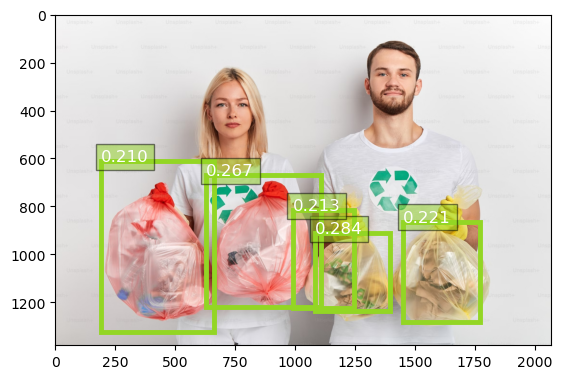

In [160]:
show_plastic_prediction('Polythene_images/premium_photo-1682097121643-5289deab5ca2.jpg',endpoint_name)

number of detections to show 1


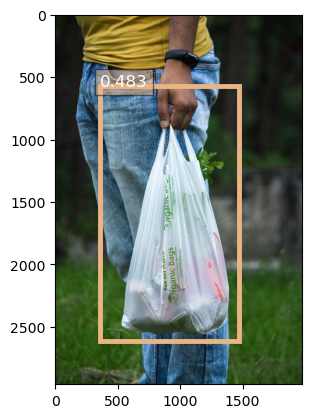

In [164]:
show_plastic_prediction('Polythene_images/photo-1604564841521-a87b82cd3c22.jpg',endpoint_name)